In [1]:
import pandas as pd
import numpy as np
import requests
import io

from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_file(url): 
    reader=requests.get(url).content
    reader=pd.read_csv(io.StringIO(reader.decode('utf-8')))# Reading the CSV into Pnadas
    return reader 

In [3]:
def save_file(name):            # Save File as CSV
    pd.to_csv(name)

In [4]:
def column_edit(dataset):                  # Editing Column Names
    final = [] 
    final_column = []         
    column = dataset.columns.str.strip().str.split("/")
    for data in column:
        data[0] = (data[0].replace("1", "January").replace("2", "Feburary").replace("3", "March")
                   .replace("4", "April").replace("5", "May"))
    
    for data in column:
        if len(data) < 3:
            data[0:] = ['/'.join(data[0:])]
            final.append(data)
        else:
            del data[2]
            data[0:] = ['_'.join(data[0:])]
            final.append(data)
            
    for data in final:
        final_column.append(data[0])
    dataset.columns = final_column
    return dataset

In [5]:
def numbers_per_day(dataset, total):         # Regenerating Numbers per day
    datasets = dataset.copy()
    dat = []
    i = 0
    for data in dataset.columns[4:]:
        if data == "January_22":
            dat.append(data)
        else: 
            datasets[data] = dataset[data] - dataset[dat[i]]
            dat.append(data)
            i += 1
    datasets.iloc[1:, 4:] = datasets.iloc[1:, 4:].astype(int)
    datasets[total] = datasets.iloc[:, 4:].sum(axis=1)
    return datasets

In [7]:
url_confirmed="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
confirmed = read_file(url_confirmed)

In [8]:
confirmed = column_edit(confirmed) # Editing column Names
confirmed

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_1,May_2,May_3,May_4,May_5,May_6,May_7,May_8,May_9,May_10
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,16,16,16,23,174,174,187,208,208,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7,10,10,12,22,25,25,34,34,51
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,1,3,3,3,3,8,8,8,11,11


In [9]:
confirmed_per_day = numbers_per_day(confirmed, total = "Total_confirmed") # Generating Numbers Per day
confirmed_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_2,May_3,May_4,May_5,May_6,May_7,May_8,May_9,May_10,Total_confirmed
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,134,235,190,330,168,171,215,255,369,4402
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,7,6,8,17,12,10,8,6,12,868
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,141,179,174,190,159,185,187,189,165,5723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,2,1,2,1,0,1,0,2,1,755
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,0,0,1,0,0,7,0,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,7,151,0,13,21,0,0,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3,0,2,10,3,0,9,0,17,51
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,2,0,0,0,5,0,0,3,0,11


In [10]:
url_death = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
death = read_file(url_death)   # Reading global Number of Deaths 


In [11]:
death = column_edit(death)                       # Editing Clomn Names

In [12]:
death_per_day = numbers_per_day(death, total = "Total_death") # Generating Numbers per day

In [13]:
death_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_2,May_3,May_4,May_5,May_6,May_7,May_8,May_9,May_10,Total_death
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,4,13,5,5,9,2,3,6,5,120
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6,4,2,5,6,7,5,6,8,502
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,48
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,2,0,0,1,1,0,0,5
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,2,1,0,2,0,1,8
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
url_recovery = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
recovery = read_file(url_recovery)   # Reading Global recovery from Covid-19 per country

In [15]:
recovery = column_edit(recovery)                     # Editing Column Names

In [16]:
recovery_per_day = numbers_per_day(recovery, total = "Total_recovery")  # Generating Numbers per day

In [17]:
recovery_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_2,May_3,May_4,May_5,May_6,May_7,May_8,May_9,May_10,Total_recovery
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,21,14,52,24,37,10,4,30,56,558
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,31,12,12,27,25,10,15,7,23,650
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,51,64,62,69,130,126,144,79,132,2678
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4,21,6,15,7,5,11,8,5,550
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
recovery_per_day.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 115 entries, Province/State to Total_recovery
dtypes: float64(2), int64(111), object(2)
memory usage: 226.5+ KB


In [19]:
death_ready = death_per_day["Total_death"]                     # Preparing datas o be merged
recovery_ready = recovery_per_day["Total_recovery"]
confirmed_ready = confirmed_per_day[["Province/State", "Country/Region", "Total_confirmed"]] 

In [20]:
combined = pd.concat([ confirmed_ready, recovery_ready, death_ready], axis = 1) # Merging Datas using Conecnation

In [21]:
len(combined["Total_death"]) == len(death_per_day["Total_death"])   # Checking if correct data is merged

True

In [22]:
combined.head(12)

,Province/State,Country/Region,Total_confirmed,Total_recovery,Total_death
0,NaN,Afghanistan,4402,558.0,120
1,NaN,Albania,868,650.0,31
2,NaN,Algeria,5723,2678.0,502
3,NaN,Andorra,755,550.0,48
4,NaN,Angola,45,13.0,2
5,NaN,Antigua and Barbuda,25,19.0,3
6,NaN,Argentina,6034,1757.0,305
7,NaN,Armenia,3313,1325.0,45
8,Australian Capital Territory,Australia,107,104.0,3
9,New South Wales,Australia,3053,2517.0,44


In [23]:
country_to_continent = pd.read_csv("countryContinent.csv", encoding="UTF-8") # Importing Continent and Country

In [24]:
country_to_continent.head(12)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,≈land Islands,AX,ALA,248.0,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16.0,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
5,Andorra,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
6,Angola,AO,AGO,24.0,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
7,Anguilla,AI,AIA,660.0,ISO 3166-2:AI,Americas,Caribbean,19.0,29.0
8,Antarctica,AQ,ATA,10.0,ISO 3166-2:AQ,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28.0,ISO 3166-2:AG,Americas,Caribbean,19.0,29.0


In [25]:
country_continent = country_to_continent[["country", "continent", "sub_region"]]  

In [26]:
country_continent.describe()

,country,continent,sub_region
count,252,243,240
unique,252,5,22
top,Sierra Leone,Africa,Caribbean
freq,1,58,28


In [27]:
country_continent["continent"].value_counts()

Africa      58
Americas    55
Asia        53
Europe      52
Oceania     25
Name: continent, dtype: int64

In [28]:
Africa = country_continent[country_continent["continent"] == "Africa"][["country", "continent"]]

In [29]:
Africa = Africa["country"].to_list()
Africa=[each_string.lower() for each_string in Africa]

In [30]:
America = country_continent[country_continent["continent"] == "Americas"][["country", "continent"]]

In [31]:
America = America["country"].tolist()
America =[each_string.lower() for each_string in America]

In [32]:
Europe = country_continent[country_continent["continent"] == "Europe"][["country", "continent"]]

In [33]:
Europe = Europe["country"].to_list()
Europe = [each_string.lower() for each_string in Europe]

In [34]:
Asia = country_continent[country_continent["continent"] == "Asia"][["country", "continent"]]

In [35]:
Asia = Asia["country"].to_list()
Asia = [each_string.lower() for each_string in Asia]

In [36]:
Oceania = country_continent[country_continent["continent"] == "Oceania"][["country", "continent"]]

In [37]:
Oceania = Oceania["country"].to_list()
Oceania =[each_string.lower() for each_string in Oceania]

In [38]:
country_continent[country_continent["continent"] == None][["country", "continent"]]

,country,continent


In [39]:
print(combined["Country/Region"].value_counts())

China             33
Canada            15
France            11
United Kingdom    11
Australia          8
                  ..
Armenia            1
Barbados           1
Poland             1
Romania            1
Luxembourg         1
Name: Country/Region, Length: 187, dtype: int64


In [40]:
combined = combined.groupby("Country/Region").sum().reset_index()

In [41]:
combined

,Country/Region,Total_confirmed,Total_recovery,Total_death
0,Afghanistan,4402,558.0,120
1,Albania,868,650.0,31
2,Algeria,5723,2678.0,502
3,Andorra,755,550.0,48
4,Angola,45,13.0,2
...,...,...,...,...
182,West Bank and Gaza,375,67.0,2
183,Western Sahara,6,0.0,0
184,Yemen,51,0.0,8
185,Zambia,267,117.0,7


In [42]:
with pd.option_context('mode.chained_assignment', None): #Avoiding Chained Assignement 
    def continent(val):                                   #Categorizng the 
        if val.lower() in Africa:
            return "Africa"
        elif val.lower() in America:
            return "America"
        elif val.lower() in Asia:
            return "Asia"
        elif val.lower() in Europe:
            return "Europe"
        elif val.lower() in Oceania:
            return "Oceania"
        else:
            return "Others"
    combined["Continent"] = combined["Country/Region"].str.strip().apply(continent).copy()

In [43]:
combined[combined["Continent"] == "Others"]

,Country/Region,Total_confirmed,Total_recovery,Total_death,Continent
48,Diamond Princess,712,2763.0,13,Others
58,Eswatini,172,492.0,2,Others
103,MS Zaandam,9,0.0,2,Others
182,West Bank and Gaza,375,67.0,2,Others


In [44]:
combined[combined["Country/Region"] == "US"]

,Country/Region,Total_confirmed,Total_recovery,Total_death,Continent
173,US,1329260,216169.0,79526,America


In [46]:
combined_group = combined.groupby("Continent").sum().reset_index()
combined_group

,Continent,Total_confirmed,Total_recovery,Total_death
0,Africa,63121,164743.0,2288
1,America,1770793,386651.0,105296
2,Asia,668416,402550.0,22187
3,Europe,1589630,442491.0,152801
4,Oceania,8471,9223.0,118
5,Others,1268,3322.0,19


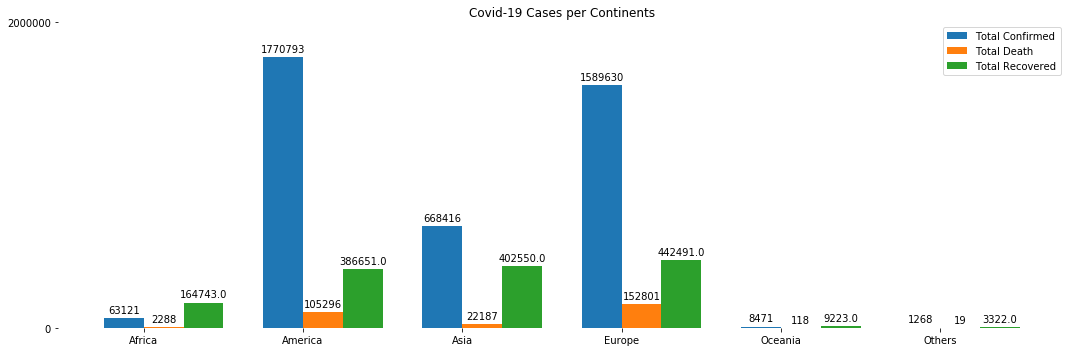

In [87]:
labels = combined_group["Continent"]
Total_confirmed = combined_group["Total_confirmed"]
Total_recovery = combined_group["Total_recovery"]
Total_death = combined_group["Total_death"]

x = np.arange(start=0, stop=12, step=2)             # the label locations
width = 0.5                          # the width of the bars

fig, ax = plt.subplots(figsize = (15,5))
rects1 = ax.bar(x - width/2, Total_confirmed, width, label='Total Confirmed')
rects2 = ax.bar(x + width/2, Total_death, width, label='Total Death')
rects3 = ax.bar(x + 3*(width/2) , Total_recovery, width, label = "Total Recovered")
# text for labels, title and custom x-axis tick labels, etc.
spines = ["bottom", "right", "left", "top"]
for spot in spines:
            ax.spines[spot].set_visible(False)
ax.set_title('Covid-19 Cases per Continents')
ax.set_yticks([0,2000000])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Reacts to display height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()